In [48]:
import pandas as pd #If this line doesn't run, please make sure you are using Python 3.0, not 3.6
import matplotlib.pyplot as plt
import numpy 
import scipy

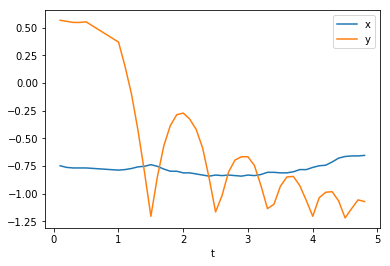

In [57]:
ball = pd.read_csv("bouncing_ball.csv")
ball.plot('t') #plots my y (vertical position) and x (horizontial position) data against the variable t (time)

If you cannot plot your data using ball.plot('t') check and see if your data has a header on it. Your data should look like print.ball() below, with the first line being just the variable names. If you're using Tracker that means you need to delete 'mass_A'.

In [58]:
line = numpy.polyfit(ball.t, ball.y, 9) #notice that it's t (time) then x (position). 1 refers to linear here. 
# numpy.polyfit? #Uncomment this line if you wish to look a bit closer to the polyfit command
p = numpy.poly1d(line) #Do this to convert it into a usable form for plotting

          9          8         7        6         5         4         3
-0.01416 x + 0.3276 x - 3.186 x + 16.9 x - 53.01 x + 99.31 x - 106.7 x
          2
 + 58.97 x - 14.03 x + 1.561


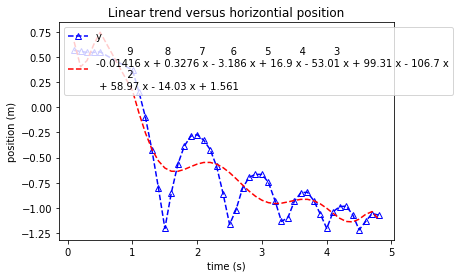

In [59]:
fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(ball.t,ball.y, c='b',marker="^",ls='--',label='y',fillstyle='none') #Data is horizontial axis, then vertical axis
#ax.plot(ball.t,ball.y,c='g',marker=(8,2,0),ls='--',label='y') #Saving time versus vertical position for later
ax.plot(ball.t, p(ball.t), c = 'r', ls = '--', label= p) #plotting the linear formula

#plt.text(2, 0.65, 'y = {} x + {}'.format(m, b)

plt.legend(loc=2) #Legends are very useful
plt.draw()
plt.title("Linear trend versus horizontial position")
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
print(p) #So you can see the form of the polynomial that was fitted. In this case it is y = mx + b
#plt.text? #another way to add annotations to a plot

Really though I want to look at the bounces independantly from each other. So I'd rather break it up from the bottom of the first bounce to the beginning of the second bounce. To do that I need to break up the data and then analyze it. I could add the polyfit and up the number of degree's it would look at, but that's quite a bit harder and does not really capture the movement. As you can see above the red line aka the poly fit, does not hit the bottom position. 

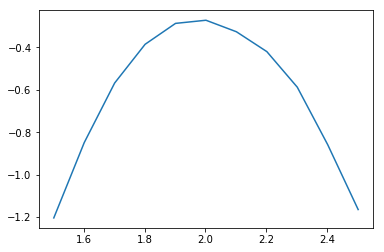

In [69]:
ii= range(10, 21) #Here I redefine my time period I want to look at. Make sure that the range does not go beyond the number of points you have. If you want to see how many points you have you can use ball.count(). 
y_bounce1 = ball.loc[ii,'y' ]
t_bounce1 = ball.loc[ii,'t']
plt.plot(t_bounce1, y_bounce1)

## Fitting tips and tricks
I use the package numpy.polyfit() to do the fitting, which does a Least squares polynomial fit. You do not need to know what that means at this moment, but I've included a lecture on this topic below. What you need to know is that it eyeballs a fit, then checks how far that fit is from the points, then adjusts slightly. The number of times it adjusts depends on how powerful your processor it, and how much it must adjust at the beginning depends on how good your initial guess it. 

That is what the '2' is in the code below is, our guess. For numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False) deg is short for degree, or degree of polynomial to fit your data to. Linear lines have a deg of 1 ( $y = ax + b$), then a second degree polynomia would have another x term, so $y = a x^{2} + bx + c$. 

Polyfit information: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

Least squares fit Lecture: https://www.youtube.com/watch?v=3hz6Tb1i2FY

In [70]:
fit_bounce1 = numpy.polyfit(t_bounce1, y_bounce1, 3) #notice that it's t (time) then x (position). 1 refers to linear here. 
p = numpy.poly1d(fit_bounce1) 
#Do this to convert it into a usable form for plotting

        3         2
0.5871 x - 7.202 x + 21.67 x - 19.49


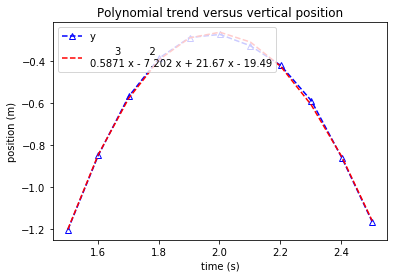

In [71]:
fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(t_bounce1, y_bounce1, c='b',marker="^",ls='--',label='y',fillstyle='none') #Data is horizontial axis, then vertical axis
ax.plot(t_bounce1, p(t_bounce1), c = 'r', ls = '--', label= p) #plotting the linear formula

plt.legend(loc=2) #Legends are very useful
plt.draw()
plt.title("Polynomial trend versus vertical position")
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
print(p) #So you can see the form of the polynomial that was fitted. In this case it is y = mx + b
#plt.text? #another way to add annotations to a plot


Okay now I am calculating the velocity and acceleration of my falling ball. 

In [79]:
y_bounce1.size #To see how long jj needs to be. jj = y_bounce1.size - 1 

11

In [ ]:
vel_y = numpy.diff(y_bounce1)  #Velocity calculation
acc = numpy.diff(vel_y)


#To make the time and velocity vector's the same length. Your data might be a different size than mine, so to check use the code  

jj = 10
t_diff = t_bounce1[:jj] 

y_bounce1.size

fit_bounce1_velocity = numpy.polyfit(t_diff, vel_y, 1) #notice that it's t (time) then x (position). 1 refers to linear here. 
p_vel = numpy.poly1d(fit_bounce1_velocity) #Do this to convert it into a usable form for plotting

# Now I'm going to plot my fit and my velocity 

 
-0.7398 x + 1.448


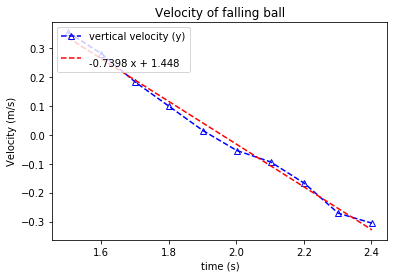

In [83]:
#plt.plot(vel_y,t_bounce1[:8])

fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(t_diff, vel_y, c='b',marker="^",ls='--',label='vertical velocity (y)',fillstyle='none') #Data is horizontial axis, then vertical axis
ax.plot(t_diff, p_vel(t_diff), c = 'r', ls = '--', label= p_vel) #plotting the linear formula
#plt.text(2, 0.65, 'y = {} x + {}'.format(m, b)

plt.legend(loc=2) #Legends are very useful
plt.draw()
plt.title("Velocity of falling ball")
ax.set_xlabel('time (s)')
ax.set_ylabel('Velocity (m/s)')
print(p_vel) #So you can see the form of the polynomial that was fitted. In this case it should be y = mx + b
#plt.text? #another way to add annotations to a plot



Now I want to calculate my uncertainties between my 'theory' and actual fit. For this section we would like you to calculate the how close the theory matches the data. If I estimate my error on the position (y) to be around .1 m, and my error on my time to be around .1 s (t), then I will use the rule of propogating errors through a quotent (y/t = v). (http://web.mit.edu/fluids-modules/www/exper_techniques/2.Propagation_of_Uncertaint.pdf)

In [84]:
dt = 0.1; dy =1
dv = (dt/ t_bounce1[:jj] + dy/ y_bounce1[:jj]) * vel_y
print(dv)

ValueError: operands could not be broadcast together with shapes (8,) (10,) 

# Basketball Shot
Now I will analyze the basketball shot's velocity and acceleration. Turns out you can download the v(t) and a(t) from Tracker as well! You just have to press the "Table" button on the chart.

In [ ]:
bball = pd.read_csv("BasketballShot.csv")
bball.plot('t','y') #As you can see I set my axis to where the bball began, but you can see that maybe I should have put it at the ground. 

In [ ]:
fit_bounce1 = numpy.polyfit(bball('t') , bball('y'), 2) 
#notice that it's t (time) then x (position). 1 refers to linear here. 
p = numpy.poly1d(fit_bbally) #Do this to convert it into a usable form for plotting

In [ ]:
fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(bball.t, bball.y, c='b',marker="^",ls='--',label='y',fillstyle='none') #Data is horizontial axis, then vertical axis
ax.plot(bball.t, p(bball.t), c = 'r', ls = '--', label= p) #plotting the linear formula

plt.legend(loc=2) #Legends are very useful
plt.draw()
plt.title("Polynomial trend versus vertical position")
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')

As you can see here this is not a pretty fit. It's actually quite a bad fit. 

In [ ]:
ii= range(10, 40) #Here I redefine my time period I want to look at
bball1_y = bball.loc[ii'y' ]
bball1_t = bball.loc[ii't']
plt.plot(bball1_t, bball1_y)


In [ ]:
tb1 = bball.loc[ii't']
yb1 = bball.loc[ii'y']

bball_fit_2 = numpy.polyfit(bball.loc[ii't'] , bball.loc[ii'y'], 2) 
#notice that it's t (time) then x (position). 1 refers to linear here. 
p = numpy.poly1d(bball_fit_2) #Do this to convert it into a usable form for plotting

In [ ]:
fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(tb1, yb1, c='b',marker="^",ls='--',label='y',fillstyle='none') #Data is horizontial axis, then vertical axis
ax.plot(tb1, p(tb1), c = 'r', ls = '--', label= p) #plotting the linear formula

plt.legend(loc=2) #Legends are very useful
plt.draw()
plt.title("Polynomial trend versus vertical position")
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')